Atlanta has the most damages. Having multiple entries in the top 10

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import wrangle as w
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
scaler= MinMaxScaler()

In [10]:
df1= w.acquire()
df1= w.prep(df1)

In [35]:
df= w.get_cws_data()

In [24]:
train, validate, test, X_train, y_train, X_val, y_val, X_test, y_test = w.train_vailidate_test_split(df, 'bad_resident', 'bad_resident')

In [21]:
def get_common(df1):
    cc = [96, 105, 106, 115, 127, 131, 137, 138,142, 148, 154,
                155, 156, 163, 166, 169, 183, 189, 192, 229, 231, 233,
                245, 246, 247, 248, 249,250, 251, 253, 268, 298]
    
    six= [298, 105, 155, 154, 156, 131]
    
    bad_df= df1[df1['charge_code'].isin(cc)]
    six_df= bad_df[bad_df['charge_code'].isin(six)]
    color= ['grey', 'grey', 'grey', 'grey', 'grey','red']
    ax = sns.countplot(
                     data= six_df , x= 'charge_code', palette= color,
                     ec= 'black')
    for i in ax.containers:
            ax.bar_label(i,)
    

Takeaways:

Here we can see that Charge Code `298` is the most common, by a huge margine. 

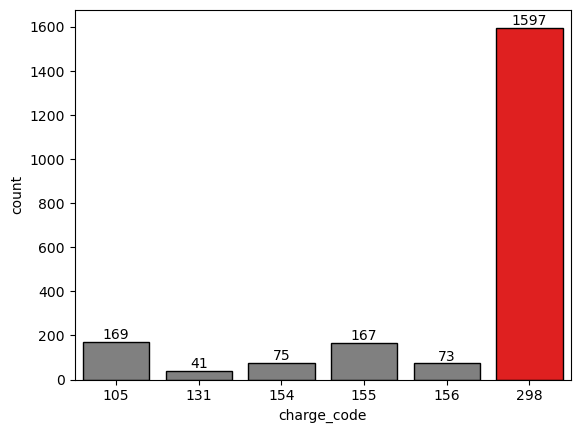

In [22]:
get_common(df1)

In [3]:
cc = [96, 105, 106, 115, 127, 131, 137, 138,142, 148, 154,
                155, 156, 163, 166, 169, 183, 189, 192, 229, 231, 233,
                245, 246, 247, 248, 249,250, 251, 253, 268, 298]

In [15]:
bad_df= df1[df1['charge_code'].isin(cc)]

In [17]:
six= [298, 105, 155, 154, 156, 131]

In [18]:
six_df= bad_df[bad_df['charge_code'].isin(six)]

In [27]:
train.head()

,id,total_charges,amount_paid,open,charge_code,description,prop_id,charge_name,sStatus,rent,term,monthly_inc,GuarantorRequired,total_inc,Recommendation,age,risk_score,reason,bad_resident
2505,63279,6.0,6.0,0,190,Pest control (01/2023),76,Pest control,Current,1679,4,14083,False,241992,Accept,45,648,Meets All Property Requirements,0
1262,45474,1479.0,1479.0,0,74,Rent (02/2023),127,Rent,Current,1479,18,4095,True,49140,Accept with Conditions (Guarantor),34,561,Severe level of Charge-offs,0
2542,63383,4.0,4.0,0,190,Pest control (02/2023),93,Pest control,Current,1269,12,3308,True,0,Accept with Conditions (Guarantor),40,632,Insufficient Income to Support Rent,0
730,31765,0.9,0.9,0,128,Valet Waste for 1 days,136,Trash service fee,Current,1689,12,1906,True,0,Accept with Conditions (Guarantor),27,771,Insufficient Income to Support Rent,0
3048,64923,5.0,5.0,0,191,Amenity fee (02/2023),121,Amenity fee,Current,1409,18,6250,False,96732,Accept with Conditions (Extra Deposit),33,0,No Credit Experience,0


In [157]:
bad_df.property_id.value_counts().unique

<bound method Series.unique of 136    736
137    629
216    215
140    105
67      51
73      50
135     48
70      36
142     25
90      24
57      24
141     23
111     17
198     13
125     11
60      11
132     10
97       9
217      7
183      7
95       7
138      7
112      6
130      6
133      5
65       5
94       5
134      5
68       4
99       4
146      3
87       3
139      3
53       3
71       3
145      2
84       2
76       2
79       2
88       2
104      1
144      1
91       1
105      1
126      1
124      1
82       1
117      1
109      1
66       1
Name: property_id, dtype: int64>

In [124]:
bad_df2= train[train['charge_code'].isin(cc)]

In [132]:
bad_prop= [136, 137, 141, 138, 216, 139, 142, 67, 135, 60]
bad_prop_df= bad_df2[bad_df2['prop_id'].isin(bad_prop)]

In [161]:
def bad_prop_plot(train, bad_prop_df):
    '''
    This function is used to plot show the wisdom difference between all characters, 
    and those who have both high intelligence and dexterity.
    '''
    
    bad_prop= [136, 137, 141, 138, 216, 139, 142, 67, 135, 60]
    bad_prop_df= bad_df2[bad_df2['prop_id'].isin(bad_prop)]
    color= ['grey', 'grey', 'grey', 'grey', 'grey','red',  'grey', 'grey', 'grey',]
    
    fig = plt.figure()
    sns.set(font_scale = 3)
    ax1 = fig.add_subplot(223)
    sns.set(rc={'figure.figsize':(30.7,24.27)})
    sns.set(font_scale = 3)
    sns.countplot(data= train, x= 'bad_resident')

    ax1.set_xlabel('Bad Resident Count', fontsize = 35)
    ax1.set_ylabel('', fontsize = 35)

    ax2 = fig.add_subplot(224)
    sns.set(rc={'figure.figsize':(30.7,24.27)})
    sns.countplot(data= bad_prop_df, x= 'bad_resident')
    ax2.set_xlabel('Bad Residnet Count', fontsize = 35)
    ax2.set_ylabel('', fontsize = 35)
    plt.show()

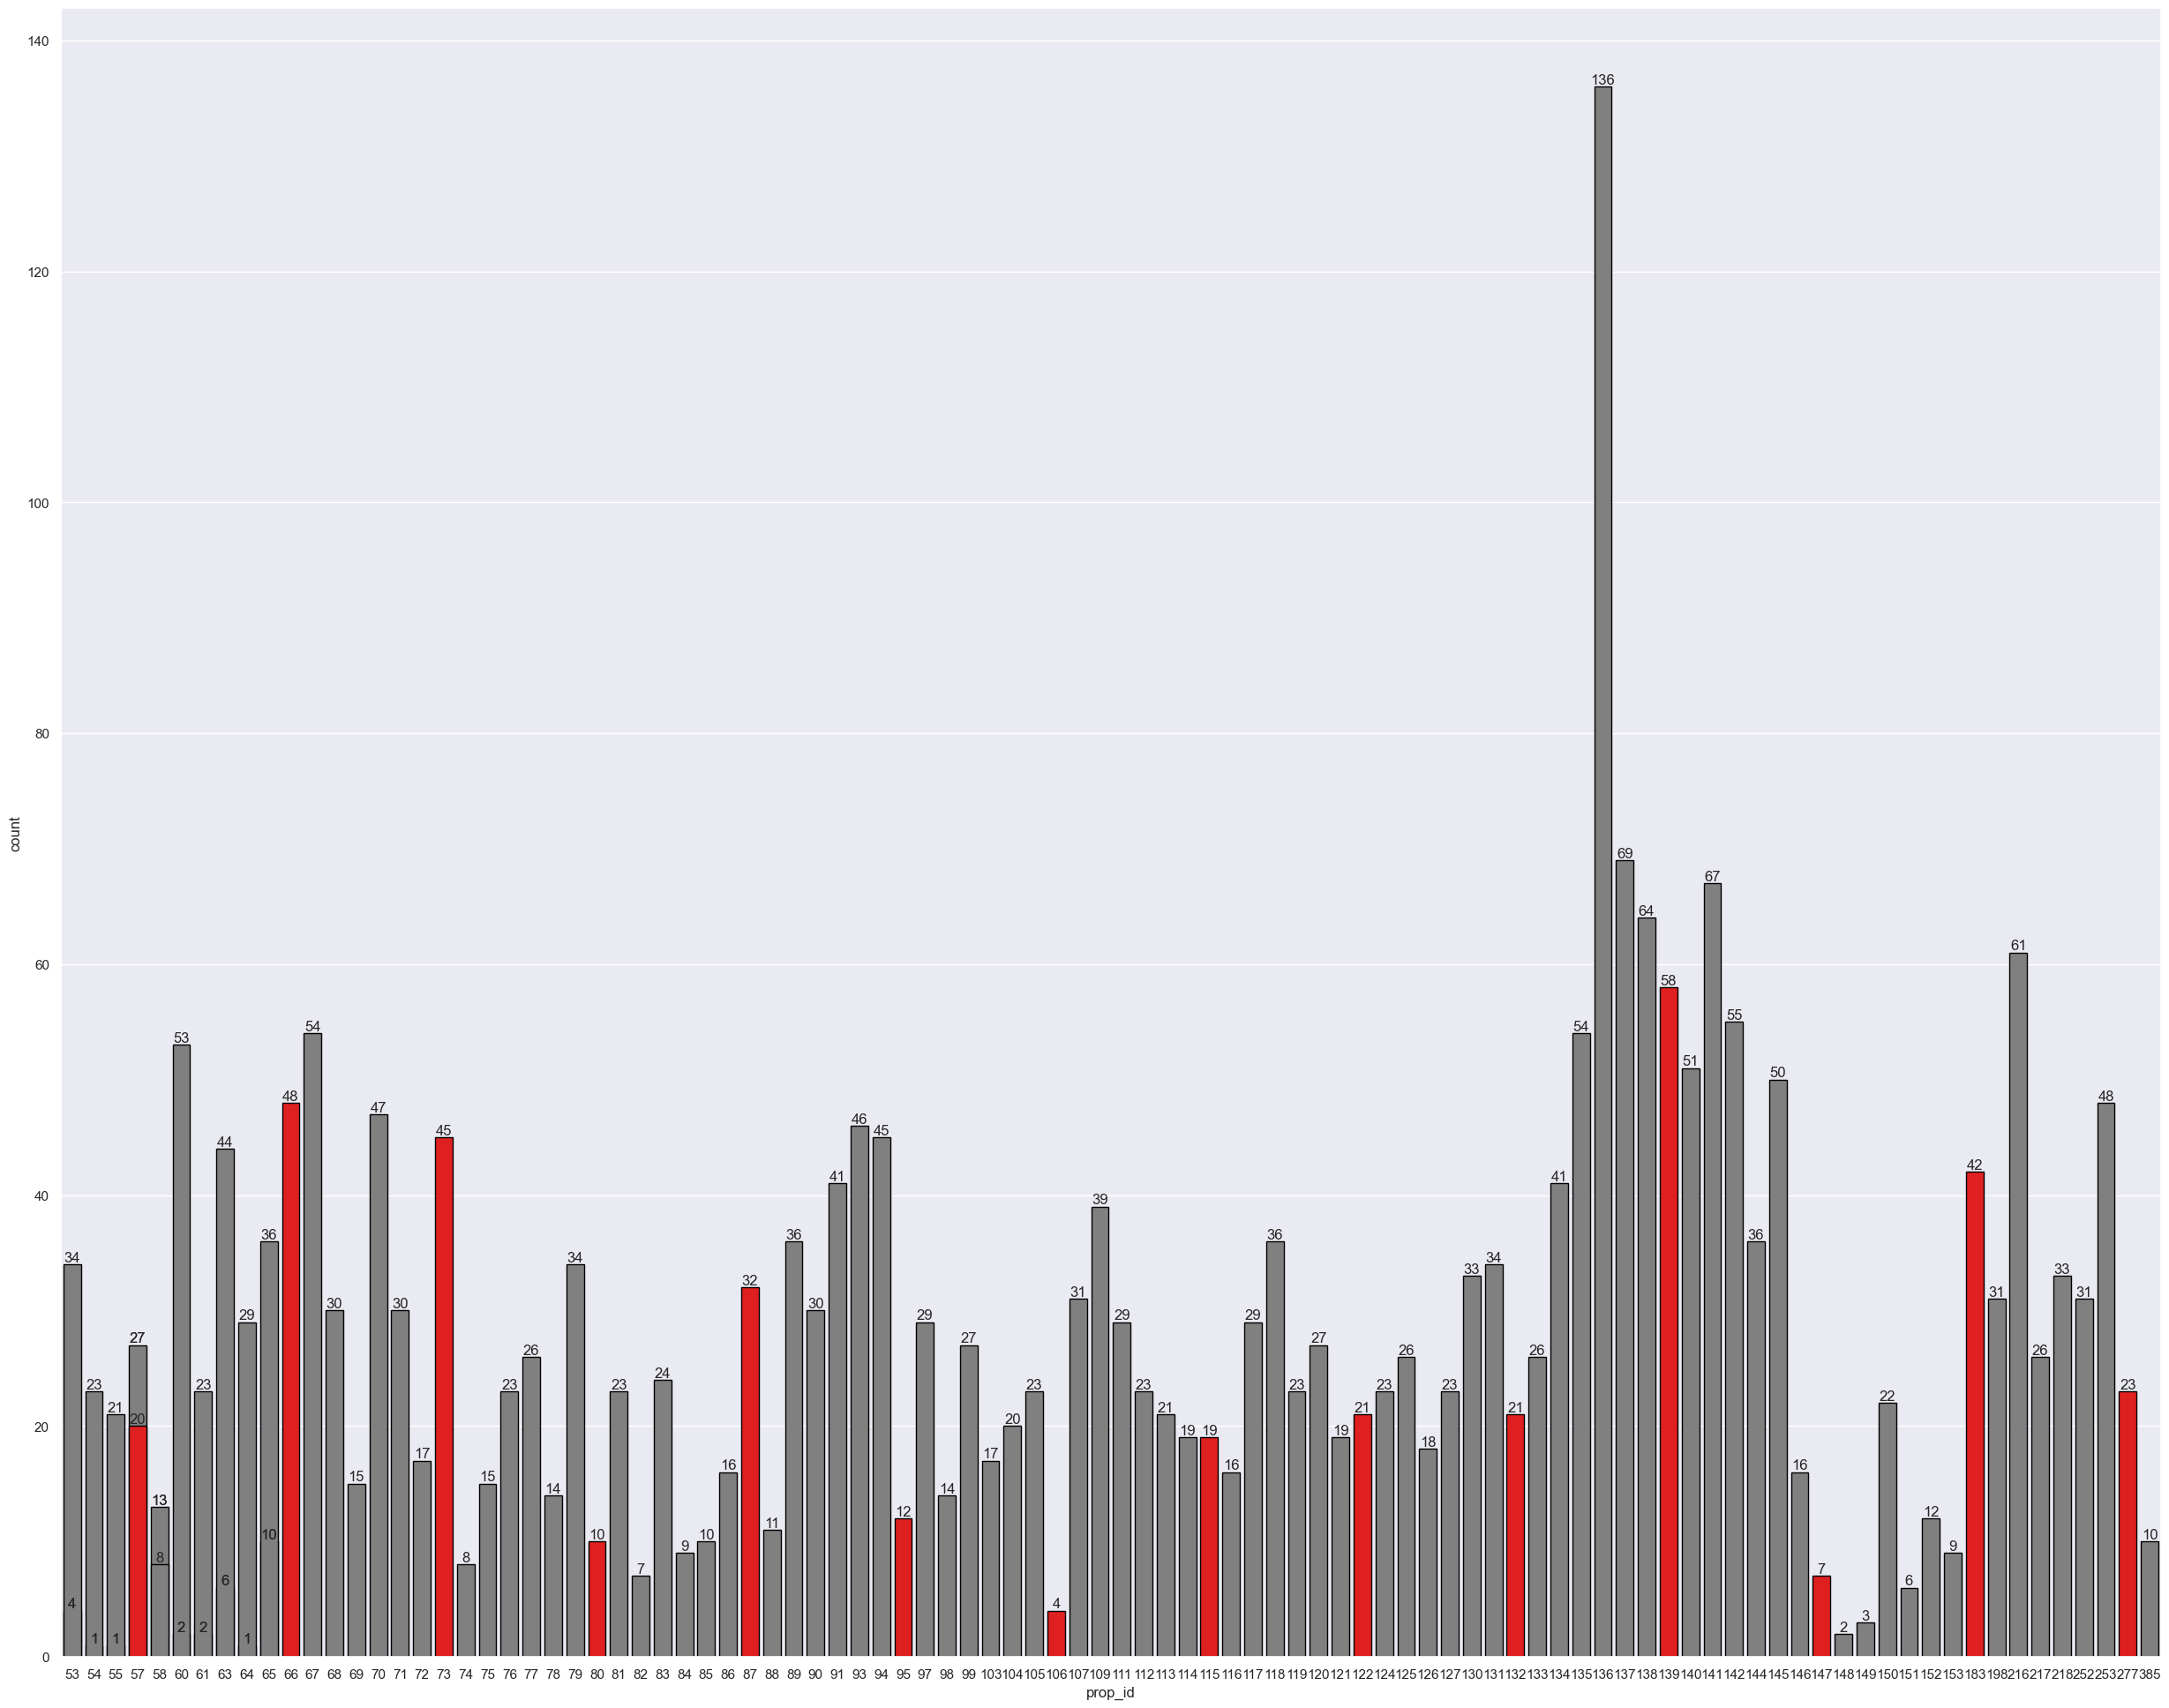

In [160]:
    bad_prop= [136, 137, 141, 138, 216, 139, 142, 67, 135, 60]
    bad_prop_df= bad_df2[bad_df2['prop_id'].isin(bad_prop)]
    color= ['grey', 'grey', 'grey', 'grey', 'grey','red',  'grey', 'grey', 'grey',]
    ax = sns.countplot(
                     data= bad_prop_df , x= 'prop_id', palette= color,
                     ec= 'black')
    for i in ax.containers:
            ax.bar_label(i,)
            


    color= ['grey', 'grey', 'grey', 'red', 'grey', 'grey', 'grey']
    ax = sns.countplot(
                     data= train , x= 'prop_id', palette= color,
                     ec= 'black')
    for i in ax.containers:
            ax.bar_label(i,)

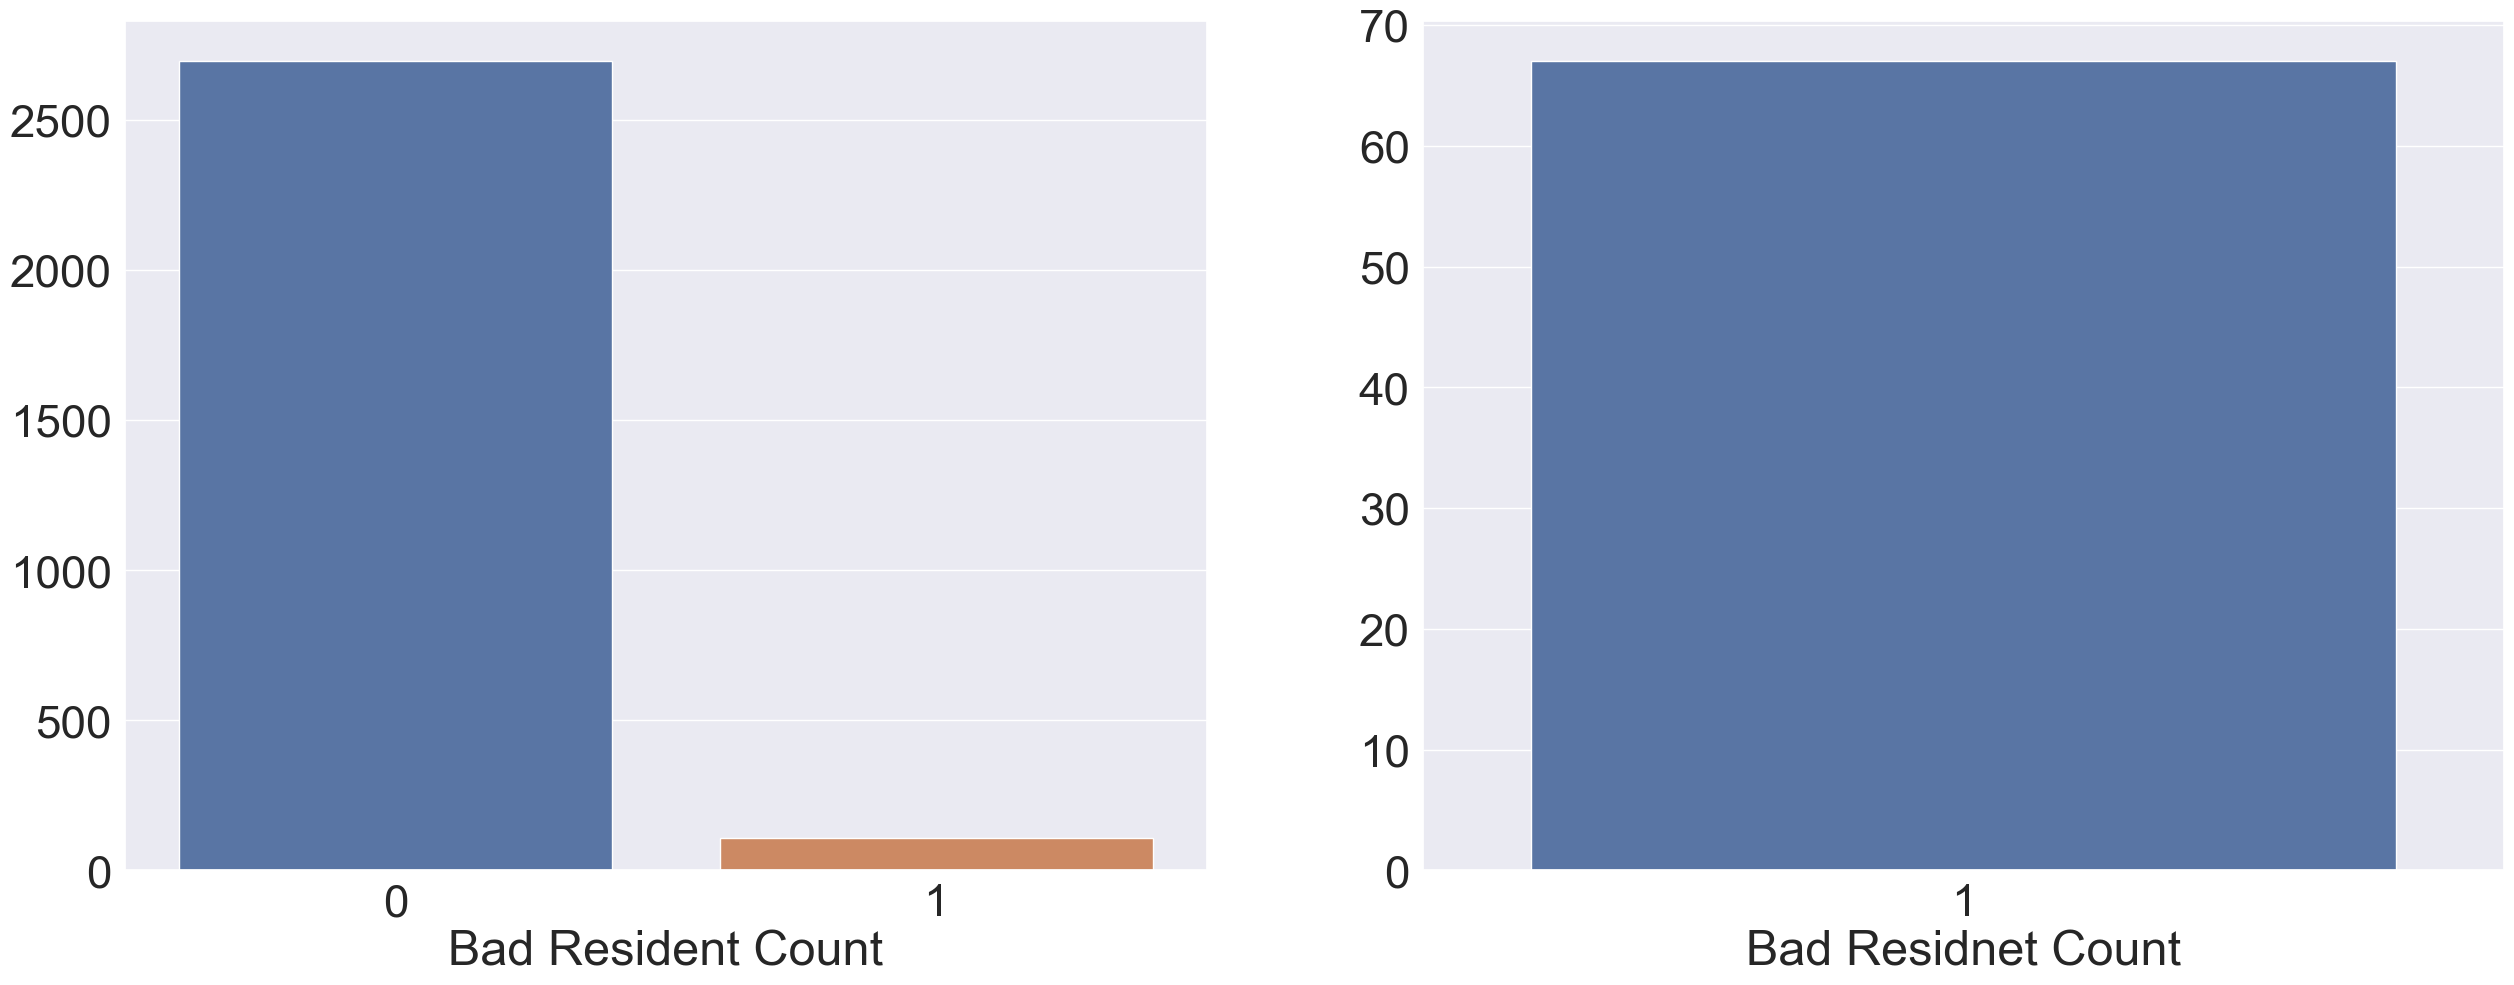

In [162]:
bad_prop_plot(train, bad_prop_df)